## The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

## Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

Review the Source Documentation
Understand the field names and data types
Identify relationships across the files
Field/feature transformations
Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship
Identify and remove duplicates
Perform other analysis like NA value and outlier detection
 

Whatever and how many slides you prepare(Be creative and come up with meaningful insight):

The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

You are not limited to only utilizing the data you have been provided.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided.  For Example: you can leverage US holiday data/ weather data

Also, do research on overall cab industry in US and try to relate that with the trend in data

Analysis

Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

In [1]:
# libraries

import pandas as pd
import numpy as np

In [2]:
# import datasets

cab_df = pd.read_csv("Cab_Data.csv")
city_df = pd.read_csv("City.csv")
customer_df = pd.read_csv("Customer_ID.csv")
transaction_df = pd.read_csv("Transaction_ID.csv")

In [3]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


All four files do not contain any missing values.  We may need to make some adjustments to the data types
Cab_df - transaction id (object). Converted number to date format using Excel before importing Cad_df.
city_df - population and users (numeric int64)
customer_df - Customer ID (object or string)
transaction_df - transaction ID and customer ID both object or string

The formatting for Date of Travel is not correct so I left it as is.  After further investigation, determined that  "42377" represented a date format in Excel. 

After these changes, let's look at the first few rows of each file. Verify that data types are correct now.

In [7]:
cab_df["Transaction ID"] = cab_df["Transaction ID"].astype(str)
city_df["Population"] = city_df["Population"].str.replace(",", "").astype(int)   #series
city_df["Users"] = city_df["Users"].str.replace(",", "").astype(int)
customer_df["Customer ID"] = customer_df["Customer ID"].astype(str)
transaction_df["Customer ID"] = transaction_df["Customer ID"].astype(str)
transaction_df["Transaction ID"] = transaction_df["Transaction ID"].astype(str)

cab_df["Date of Travel"] = pd.to_datetime("1899-12-30") + pd.to_timedelta(cab_df["Date of Travel"], unit="D")

Assistance from Co-Pilot :

If you export that column as-is, Python will read those serial numbers as regular numeric values (floats or ints), not dates. So when you look at them in Python, they’re missing all context—they’re just numbers.

🧰 How to Fix It in Python
If you've already got a column of serial numbers like 42377, you can convert them to real dates using this approach:

import pandas as pd

Assuming 'YourColumn' has the Excel serial numbers
df["YourColumn"] = pd.to_datetime("1899-12-30") + pd.to_timedelta(df["YourColumn"], unit="D")

So if you can skip the TEXT() formula in Excel and export the raw serials instead, Python can handle the conversion smoothly.

Additional notes on date
`cab_df["Date of Travel"] = pd.to_datetime(cab_df["Date of Travel"]).dt.date`


This returns Python date objects, which don’t include the time part at all.

You're converting the datetime to a Python date object, which is no longer a datetime64 type that pandas recognizes for .dt operations. 
That’s why you’re getting the error when trying to use .dt afterward — it’s now just a plain object column.



In [8]:
cab_df["Year"] = cab_df["Date of Travel"].dt.year
cab_df["Month"] = cab_df["Date of Travel"].dt.month
cab_df["Day"] = cab_df["Date of Travel"].dt.day
cab_df["Day of Week"] = cab_df["Date of Travel"].dt.day_name()
cab_df["Date"] = cab_df["Date of Travel"].dt.date  # for display


In [9]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Day of Week,Date
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,8,Friday,2016-01-08
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1,6,Wednesday,2016-01-06
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,2,Saturday,2016-01-02
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1,7,Thursday,2016-01-07
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1,3,Sunday,2016-01-03


In [10]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [11]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [12]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## Understand the field names and data types
EDA - Begin with using describe() method
Identify relationships across the files
Field/feature transformations

In [13]:
cab_df.describe()

,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day
count,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,2017-08-17 01:37:55.042293760,22.567254,423.443311,286.190113,2017.045199,7.500434,15.628447
min,2016-01-02 00:00:00,1.900000,15.600000,19.000000,2016.000000,1.000000,1.000000
25%,2016-11-23 00:00:00,12.000000,206.437500,151.200000,2016.000000,5.000000,8.000000
50%,2017-09-10 00:00:00,22.440000,386.360000,282.480000,2017.000000,8.000000,16.000000
75%,2018-05-12 00:00:00,32.960000,583.660000,413.683200,2018.000000,10.000000,23.000000
max,2018-12-31 00:00:00,48.000000,2048.030000,691.200000,2018.000000,12.000000,31.000000
std,NaN,12.233526,274.378911,157.993661,0.800239,3.445095,8.827151


The average distance travelled per cab was 22.6 KM with an average fare of $423.44.

In [14]:
city_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In the selected 20 cities, 64,521 users are taking a cab.

In [15]:
customer_df.describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


The average age of the user (of cabs) is 35 years old with an average income of $15,015.63.  The youngest is 18 years old.  The oldest is 65 years old.

In [16]:
transaction_df.describe()

,Transaction ID,Customer ID,Payment_Mode
count,440098,440098,440098
unique,440098,49171,2
top,10000011,494,Card
freq,1,54,263991


There are 440,098 unique transactions.  There are users taking a cab more than once.

### Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship

The relationship starts with `city` field in `cab_df`. It will be joined (one to one) to the `city` field in `city_df`. Next, the `transaction id` field in `transaction_df` is joined (one to one) to `transaction_id` in `city_df`. Finally, `customer_id` in `transaction_df` is joined to `customer_id` in `customer_df`

In [17]:
step1 = pd.merge(cab_df, city_df, how = "left", on =["City", "City"])
step1

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Day of Week,Date,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,8,Friday,2016-01-08,814885,24701
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,6,Wednesday,2016-01-06,814885,24701
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,2,Saturday,2016-01-02,814885,24701
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,7,Thursday,2016-01-07,814885,24701
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,3,Sunday,2016-01-03,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,8,Monday,2018-01-08,418859,127001
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,4,Thursday,2018-01-04,418859,127001
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,5,Friday,2018-01-05,418859,127001
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018,1,5,Friday,2018-01-05,418859,127001


In [18]:
step2 = pd.merge(step1, transaction_df, how ="left", on= ["Transaction ID", "Transaction ID"])
step2

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Day of Week,Date,Population,Users,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,8,Friday,2016-01-08,814885,24701,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,6,Wednesday,2016-01-06,814885,24701,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,2,Saturday,2016-01-02,814885,24701,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,7,Thursday,2016-01-07,814885,24701,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,3,Sunday,2016-01-03,814885,24701,27182,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,8,Monday,2018-01-08,418859,127001,52392,Cash
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,4,Thursday,2018-01-04,418859,127001,53286,Cash
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,5,Friday,2018-01-05,418859,127001,52265,Cash
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018,1,5,Friday,2018-01-05,418859,127001,52175,Card


In [19]:
result_df = pd.merge(step2, customer_df, how = "left", on= ["Customer ID", "Customer ID"])
result_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Day of Week,Date,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,8,Friday,2016-01-08,814885,24701,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,6,Wednesday,2016-01-06,814885,24701,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,2,Saturday,2016-01-02,814885,24701,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,7,Thursday,2016-01-07,814885,24701,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,3,Sunday,2016-01-03,814885,24701,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,8,Monday,2018-01-08,418859,127001,52392,Cash,Male,24,15651
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,4,Thursday,2018-01-04,418859,127001,53286,Cash,Male,32,6528
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,5,Friday,2018-01-05,418859,127001,52265,Cash,Male,56,7966
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018,1,5,Friday,2018-01-05,418859,127001,52175,Card,Male,32,6423


In [20]:
# double check that joins did not create null values
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  object        
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Year                359392 non-null  int32         
 8   Month               359392 non-null  int32         
 9   Day                 359392 non-null  int32         
 10  Day of Week         359392 non-null  object        
 11  Date                359392 non-null  object        
 12  Population          359392 non-null  int32         
 13  Users               359392 no

In [21]:
# check for duplicate observations. if so, then use df.drop_duplicates()

duplicates = result_df[result_df.duplicated()]
duplicates

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Day of Week,Date,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)


In [22]:
# check for NA values

result_df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Year                  0
Month                 0
Day                   0
Day of Week           0
Date                  0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

# Age

There are no outliers. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4c98dab10>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4c98db080>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4c80bb650>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4c98db650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4c98db920>],
 'means': []}

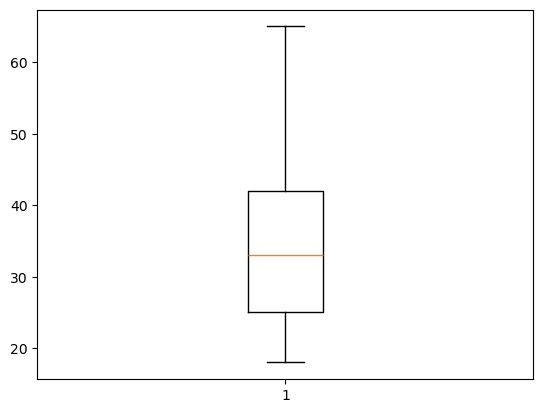

In [23]:
import matplotlib.pyplot as plt
# outliers
plt.boxplot(result_df.Age)

(array([57893., 59136., 55892., 44891., 49178., 19684., 16034., 18608.,
        19165., 18911.]),
 array([18. , 22.7, 27.4, 32.1, 36.8, 41.5, 46.2, 50.9, 55.6, 60.3, 65. ]),
 <BarContainer object of 10 artists>)

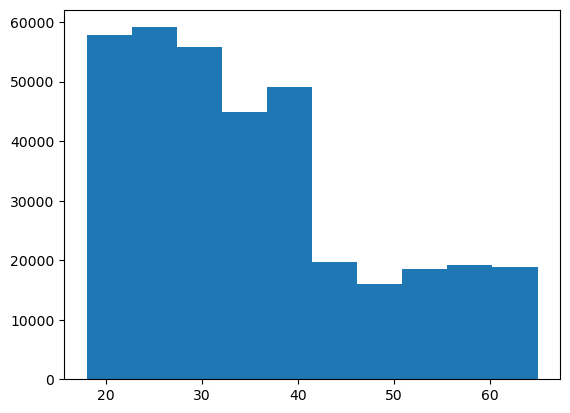

In [24]:
plt.hist(result_df.Age)

# Cost of Trip

There are no outliers. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4c99321b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4c9932750>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4cbd0fdd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4c9932d20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4cbd27380>],
 'means': []}

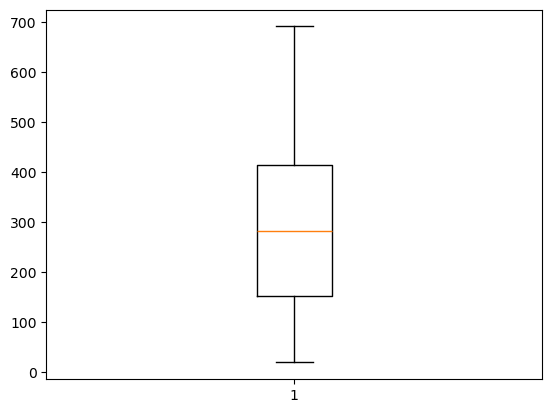

In [25]:
plt.boxplot(result_df["Cost of Trip"])

(array([45347., 46066., 46181., 45888., 46372., 45376., 41690., 28461.,
        11875.,  2136.]),
 array([ 19.  ,  86.22, 153.44, 220.66, 287.88, 355.1 , 422.32, 489.54,
        556.76, 623.98, 691.2 ]),
 <BarContainer object of 10 artists>)

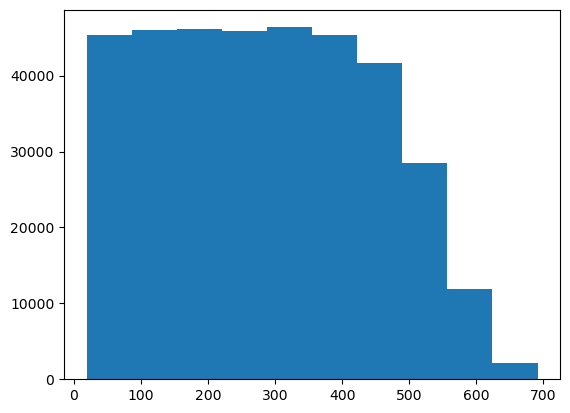

In [26]:
plt.hist(result_df["Cost of Trip"])

# Price Charged
There are a lot of outliers in "price charged" feature but we do not have duration nor a clear rate to determine if we need to remove these outliers.  So, the outliers will remain in the data.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4c9a0e780>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4c9a0ecf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4c9a0e4e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4c9a0f260>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4c9a0f530>],
 'means': []}

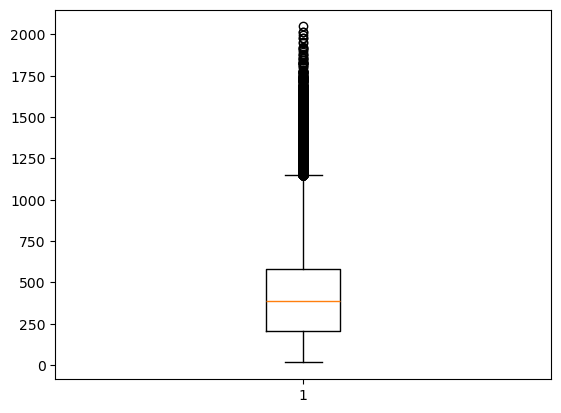

In [27]:
plt.boxplot(result_df["Price Charged"])

(array([9.60940e+04, 1.01072e+05, 8.70330e+04, 4.44660e+04, 1.91790e+04,
        8.06300e+03, 2.72200e+03, 6.30000e+02, 1.12000e+02, 2.10000e+01]),
 array([  15.6  ,  218.843,  422.086,  625.329,  828.572, 1031.815,
        1235.058, 1438.301, 1641.544, 1844.787, 2048.03 ]),
 <BarContainer object of 10 artists>)

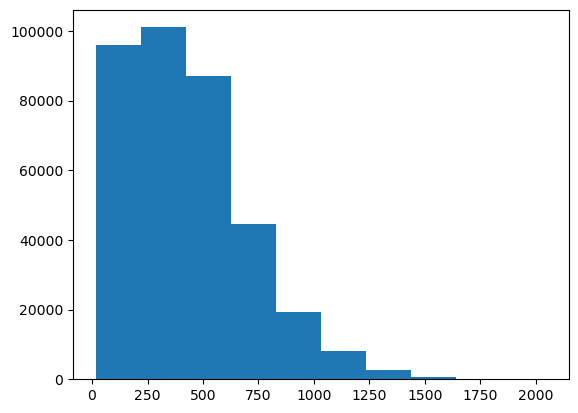

In [28]:
plt.hist(result_df["Price Charged"])

# KM Travelled

There are no outliers. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4cbe482c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4cbe48770>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4cbd759a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4cbe48b60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4cbe48fb0>],
 'means': []}

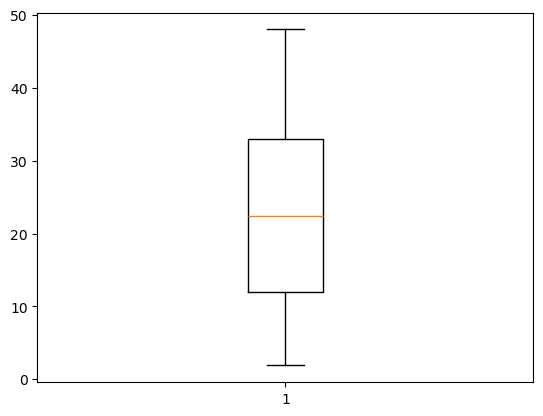

In [29]:
plt.boxplot(result_df["KM Travelled"])

(array([41817., 40537., 39633., 39540., 39330., 40048., 39192., 39776.,
        28777., 10742.]),
 array([ 1.9 ,  6.51, 11.12, 15.73, 20.34, 24.95, 29.56, 34.17, 38.78,
        43.39, 48.  ]),
 <BarContainer object of 10 artists>)

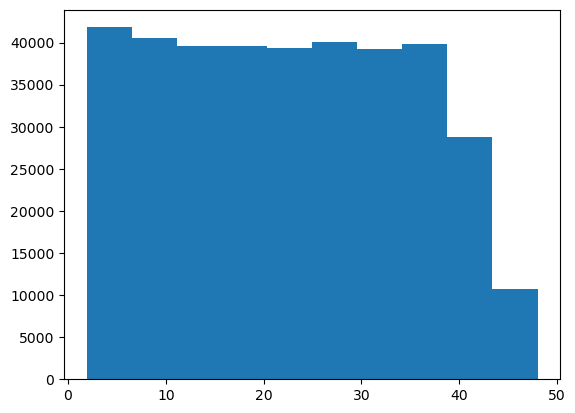

In [30]:
plt.hist(result_df["KM Travelled"])

### Assumptions
-   There are a lot of outliers in price charged but we do not have duration nor a clear rate to determine if we need to remove these outliers.  So, the outliers will remain in the data.
-   `User` feature is treated as number of people taking a cab.
-   Calculated Profit as revenue (`Price_Charged`) minus cost of goods (`Cost of Trip`)

In [31]:
result_df['Profit'] = (result_df["Price Charged"] - result_df["Cost of Trip"]).round(2)
result_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,Day of Week,Date,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,8,Friday,2016-01-08,814885,24701,29290,Card,Male,28,10813,57.32
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,6,Wednesday,2016-01-06,814885,24701,27703,Card,Male,27,9237,23.67
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,2,Saturday,2016-01-02,814885,24701,28712,Cash,Male,53,11242,27.57
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,7,Thursday,2016-01-07,814885,24701,28020,Cash,Male,23,23327,25.80
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,3,Sunday,2016-01-03,814885,24701,27182,Card,Male,33,8536,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,8,Monday,2018-01-08,418859,127001,52392,Cash,Male,24,15651,5.88
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,4,Thursday,2018-01-04,418859,127001,53286,Cash,Male,32,6528,6.90
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,5,Friday,2018-01-05,418859,127001,52265,Cash,Male,56,7966,87.42
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018,1,5,Friday,2018-01-05,418859,127001,52175,Card,Male,32,6423,32.14


In [32]:
result_df['Avg Profit per KM']= (result_df["Profit"] / result_df["KM Travelled"]).round(2)
result_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,...,Date,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Avg Profit per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,8,...,2016-01-08,814885,24701,29290,Card,Male,28,10813,57.32,1.88
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,6,...,2016-01-06,814885,24701,27703,Card,Male,27,9237,23.67,0.83
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,2,...,2016-01-02,814885,24701,28712,Cash,Male,53,11242,27.57,3.05
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,7,...,2016-01-07,814885,24701,28020,Cash,Male,23,23327,25.80,0.78
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,3,...,2016-01-03,814885,24701,27182,Card,Male,33,8536,16.84,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,8,...,2018-01-08,418859,127001,52392,Cash,Male,24,15651,5.88,1.23
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,4,...,2018-01-04,418859,127001,53286,Cash,Male,32,6528,6.90,0.82
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,5,...,2018-01-05,418859,127001,52265,Cash,Male,56,7966,87.42,3.15
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018,1,5,...,2018-01-05,418859,127001,52175,Card,Male,32,6423,32.14,3.65


In [33]:
result_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [34]:
# Determine seasonality by creating new field

month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

result_df['Season'] = result_df['Month'].map(month_to_season)

In [35]:
# Create age range to better undestand the impact age.  

bins = [0, 25, 40, 60, float('inf')]
labels = ['18-25', '26-40', '41-60', '60+']

result_df['Age Group'] = pd.cut(result_df['Age'], bins=bins, labels=labels, right=True)

In [36]:
# Create income range to better undestand which group are likley to ride in a cab.  

bins = [0, 2500, 15000, float('inf')]
labels = ['< 2,500', '2,500 - 15,000',  '> 15,000']

result_df['Income Group'] = pd.cut(result_df['Income (USD/Month)'], bins=bins, labels=labels, right=True)

In [37]:
result_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,...,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Avg Profit per KM,Season,Age Group,Income Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,8,...,29290,Card,Male,28,10813,57.32,1.88,Winter,26-40,"2,500 - 15,000"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,6,...,27703,Card,Male,27,9237,23.67,0.83,Winter,26-40,"2,500 - 15,000"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,2,...,28712,Cash,Male,53,11242,27.57,3.05,Winter,41-60,"2,500 - 15,000"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,7,...,28020,Cash,Male,23,23327,25.80,0.78,Winter,18-25,"> 15,000"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,3,...,27182,Card,Male,33,8536,16.84,1.93,Winter,26-40,"2,500 - 15,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,8,...,52392,Cash,Male,24,15651,5.88,1.23,Winter,18-25,"> 15,000"
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,4,...,53286,Cash,Male,32,6528,6.90,0.82,Winter,26-40,"2,500 - 15,000"
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,5,...,52265,Cash,Male,56,7966,87.42,3.15,Winter,41-60,"2,500 - 15,000"
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018,1,5,...,52175,Card,Male,32,6423,32.14,3.65,Winter,26-40,"2,500 - 15,000"


### Analysis

Create multiple hypothesis and investigate:
- 1   Which company has maximum cab users at a particular time period?
- 2   What are the average profit per KM?
- 3   What are the average annual profit?
- 4   Which gender generates most profit?
- 3   Does margin proportionally increase with increase in number of customers?
- 4   What are the attributes of these customer segments?
- 5   Is there any seasonality in number of customers using the cab service?
- 6
- 7

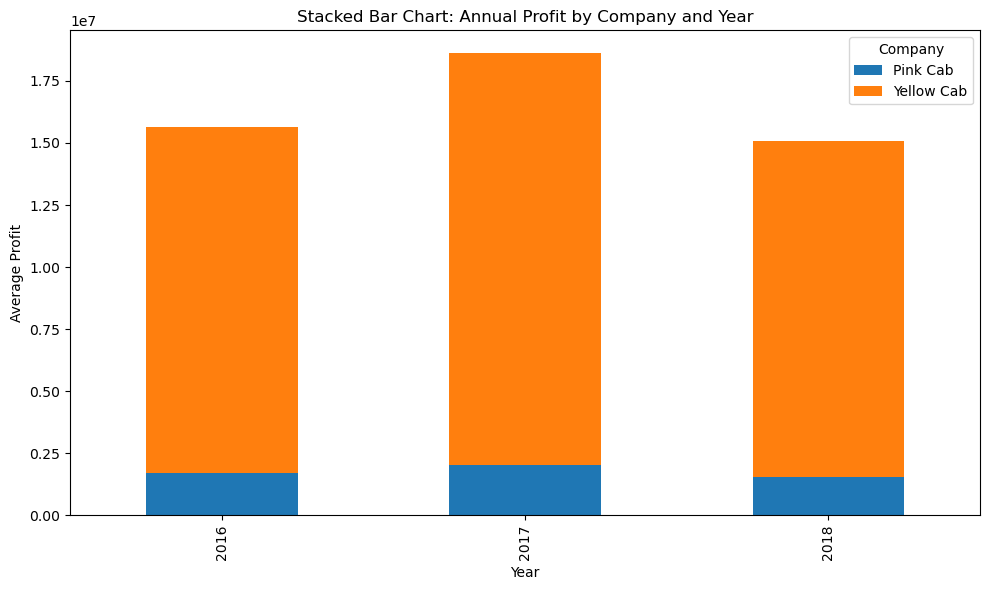

In [38]:
# Which company has maximum cab users at a particular time period?

# What are the average profit per KM?

grouped = result_df.groupby(['Company', 'Year'])['Profit'].sum().reset_index()
pivot_df = grouped.pivot(index='Year', columns='Company', values='Profit').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.xlabel('Company')
plt.ylabel('Average Profit')
plt.title('Stacked Bar Chart: Annual Profit by Company and Year')
plt.legend(title='Company')
plt.tight_layout()
plt.show()



In [39]:
pivot_df

Company,Pink Cab,Yellow Cab
Year,,
2016,1713511.27,13926996.40
2017,2033655.24,16575977.40
2018,1560162.00,13517398.79


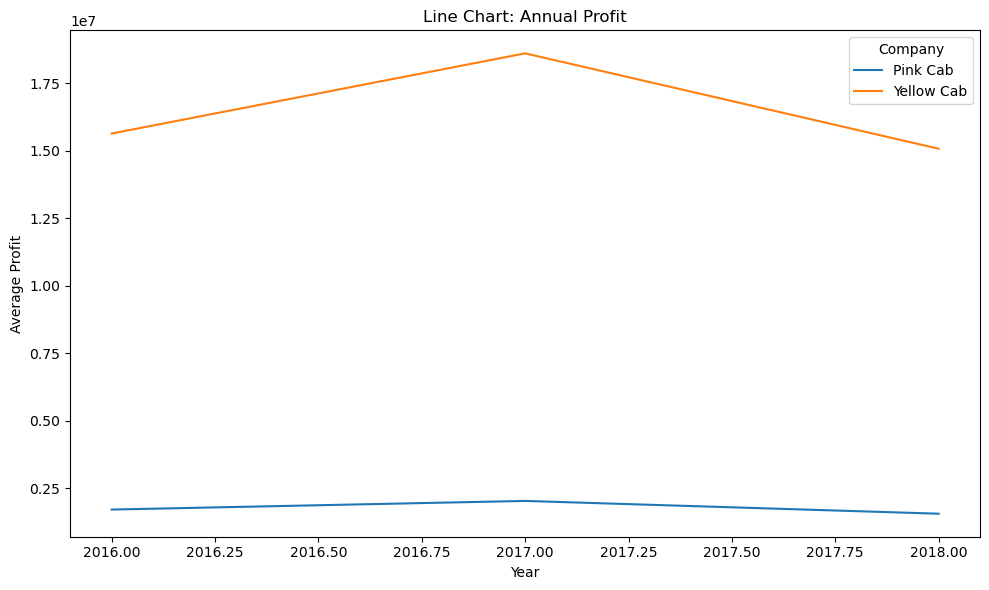

In [40]:
# yearly Profit by Company

pivot_df.plot(kind='line', stacked=True, figsize=(10, 6))
# plt.xlabel('Company')
plt.ylabel('Average Profit')
plt.title('Line Chart: Annual Profit')
plt.legend(title='Company')
plt.tight_layout()
plt.show()

In [41]:
# Profit per KM BY Company

grouped2 = result_df.groupby(['Company', 'Year'])['Avg Profit per KM'].sum().reset_index()
pivot_df2 = grouped2.pivot(index='Year', columns='Company', values='Avg Profit per KM').fillna(0)
pivot_df2

Company,Pink Cab,Yellow Cab
Year,,
2016,75912.18,615956.69
2017,89837.57,735887.12
2018,68891.76,599902.35


In [42]:
# Profit per Year BY Company

grouped3= result_df.groupby(['Company'])['Profit'].sum().reset_index()
#pivot_df3 = grouped3.pivot(index='Year', columns='Company', values='Avg Profit per KM').fillna(0)
grouped3

,Company,Profit
0,Pink Cab,5307328.51
1,Yellow Cab,44020372.59


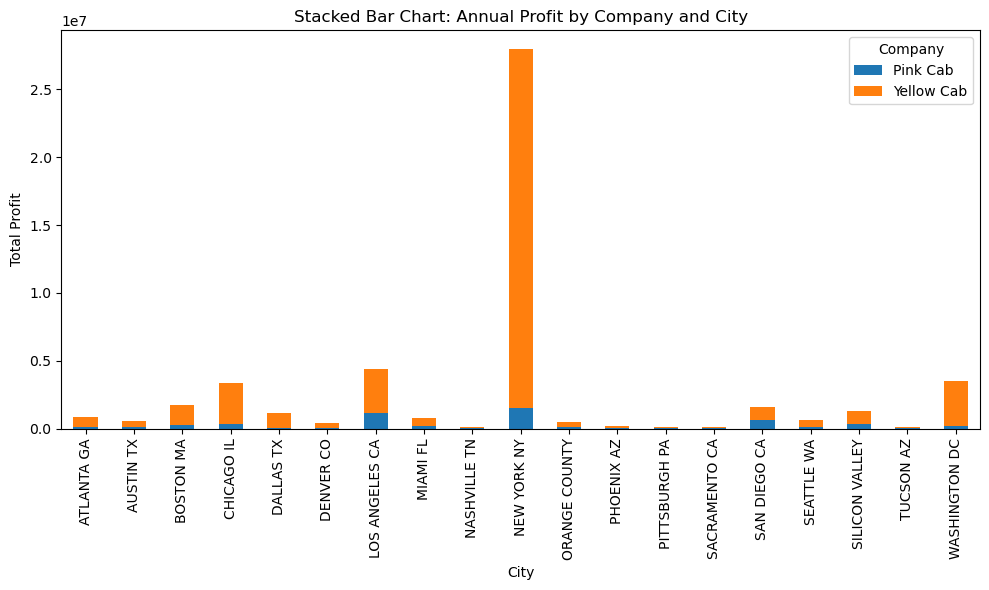

In [43]:
# Profitable by City

grouped = result_df.groupby(['Company', 'City'])['Profit'].sum().reset_index()
pivot_df7 = grouped.pivot(index='City', columns='Company', values='Profit').fillna(0)

pivot_df7.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.xlabel('Company')
plt.ylabel('Total Profit')
plt.title('Stacked Bar Chart: Annual Profit by Company and City')
plt.legend(title='Company')
plt.tight_layout()
plt.show()

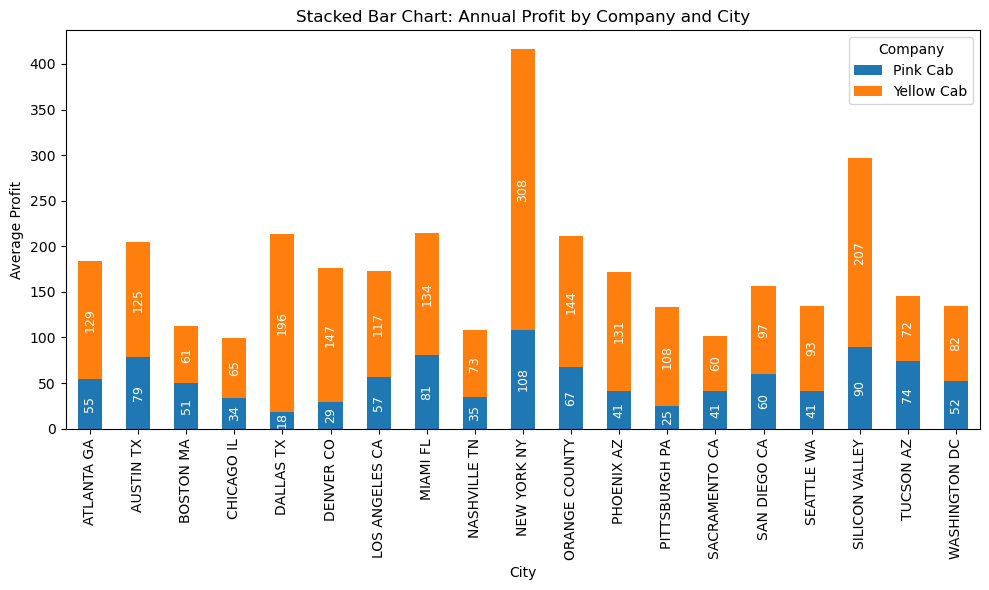

In [44]:
# Average Profitable by City

grouped = result_df.groupby(['Company', 'City'])['Profit'].mean().reset_index()
pivot_df7 = grouped.pivot(index='City', columns='Company', values='Profit').fillna(0)

ax = pivot_df7.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.xlabel('Company')
plt.ylabel('Average Profit')
plt.title('Stacked Bar Chart: Annual Profit by Company and City')
plt.legend(title='Company')
plt.tight_layout()

# Add value labels inside the bars
for container in ax.containers:

    labels = [f"{v:.0f}" if v > 0 else "" for v in container.datavalues]

    ax.bar_label(container, labels=labels,  label_type='center', fontsize=9, color='white', rotation = 90)

plt.show()

# f"{v:.0f}" rounds to the nearest whole number (you can use .1f, .2f, etc. if you want one or two decimals).
# Empty strings for zero/empty bars keep your chart uncluttered.
# This gives you tighter, cleaner visuals — perfect for dashboards, reports, or presentations

In [45]:
# Overall Profit by rider

grouped7 = result_df.groupby(['Company']).agg(
    Total_Profit=('Profit', 'sum'),
    Number_of_Users=('Customer ID', 'count'),  # Replace 'User ID' with your rider identifier column
).reset_index()

grouped7['Profit_per_Rider'] = (grouped7['Total_Profit'] / grouped7['Number_of_Users']).round(2)
grouped7

,Company,Total_Profit,Number_of_Users,Profit_per_Rider
0,Pink Cab,5307328.51,84711,62.65
1,Yellow Cab,44020372.59,274681,160.26


The pivot tables above allow us to see that Pink cab is more profitable than Yellow.  

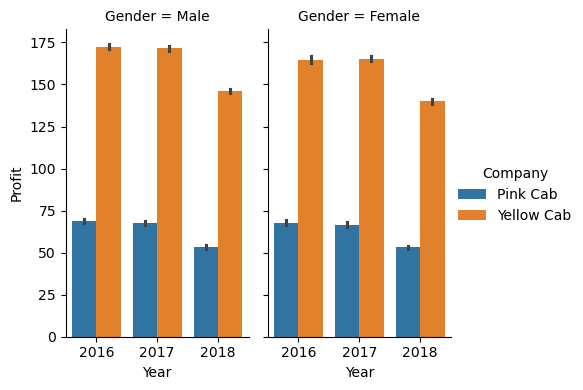

In [46]:
import seaborn as sns

# profit by Gender 

sns.catplot(
    data=result_df, x="Year", y="Profit", col="Gender", hue = 'Company',
    kind="bar", height=4, aspect=.6,
)

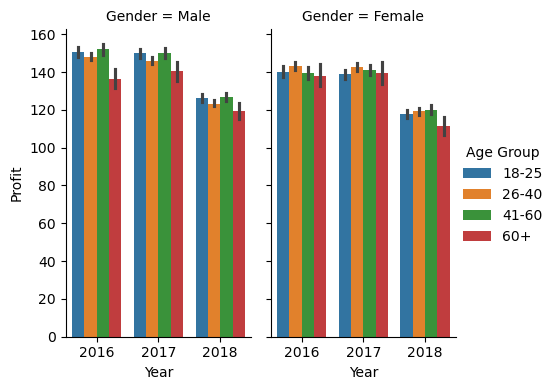

In [47]:
# profit by Age and Gender (What are the attributes of these customer segments?)

sns.catplot(
    data=result_df, x="Year", y="Profit", col="Gender", hue = 'Age Group',
    kind="bar", height=4, aspect=.6,
)

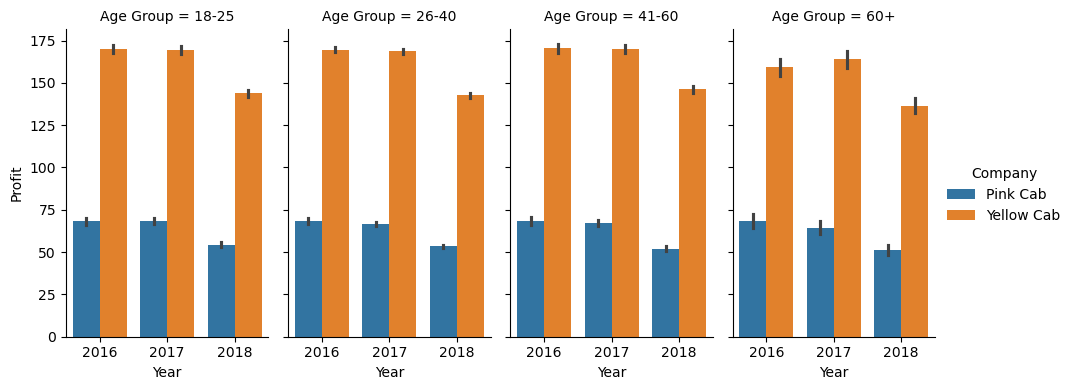

In [48]:
# profit by Age and Company 

sns.catplot(
    data=result_df, x="Year", y="Profit", col="Age Group", hue = 'Company',
    kind="bar", height=4, aspect=.6,
)

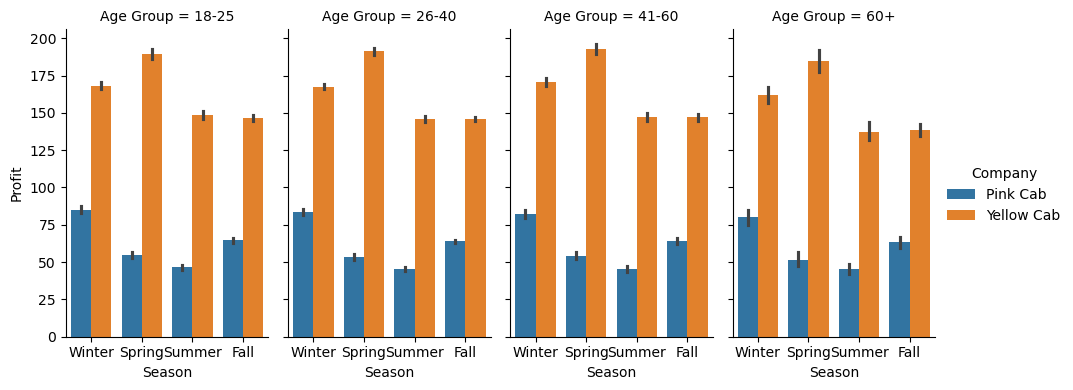

In [49]:
# profit based on season and Age by Company

sns.catplot(
    data=result_df, x="Season", y="Profit", col="Age Group", hue = 'Company',
    kind="bar", height=4, aspect=.6,
)

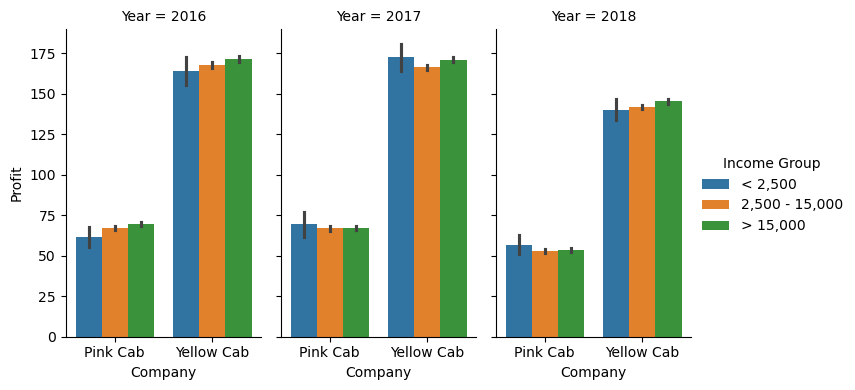

In [ ]:
# Profit by Income 

sns.catplot(
    data=result_df, x="Company", y="Profit", col="Year", hue = 'Income Group',
    kind="bar", height=4, aspect=.6,
)

In [56]:
grouped = result_df.groupby(['Year', 'Company', 'Income Group'])['Profit'].mean().reset_index()
grouped['Company_Year'] = grouped['Company'] + " " + grouped['Year'].astype(str)
pivot_df = grouped.pivot(index='Company_Year', columns='Income Group', values='Profit').fillna(0)
pivot_df

C:\Users\paula\AppData\Local\Temp\ipykernel_24252\2913419239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby(['Year', 'Company', 'Income Group'])['Profit'].mean().reset_index()


Income Group,"< 2,500","2,500 - 15,000","> 15,000"
Company_Year,,,
Pink Cab 2016,61.891404,67.279051,69.610841
Pink Cab 2017,69.598641,66.879667,67.161130
Pink Cab 2018,56.604133,52.826761,53.498015
Yellow Cab 2016,164.168015,167.693802,171.223833
Yellow Cab 2017,172.546840,166.319253,171.183292
Yellow Cab 2018,140.315000,141.678108,145.295691


### EDA recommendation and hypothesis results

After completing the analysis of yellow and Pink cab compnaies, we found that Yellow is better than Pink.  this is based on:
- Age Group:  Yellow had customers in all age groups equally using their cabs.  Age 65+ rideship was as high as 18-24.
- Average profit per KM:  the average profit for Yellow is almost 3 times as larger as Pink.
- Ridership: Ridership is significantly higher for Yellow cab compared to Pink cab.


Based on the above, we recommend an investment in Yellow cab company.